In [147]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout

In [148]:
df = pd.read_csv(r"C:\Users\sanja\Desktop\RNN-Spam\spam (1).csv", encoding="latin1")

In [149]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [150]:
df = df[['v1', 'v2']]
df.columns = ['label', 'text']

In [151]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [152]:
df['label']=df['label'].map({'ham':0, 'spam':1})
texts=df['text'].values
labels=df['label'].values

In [153]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

In [154]:
sequences=tokenizer.texts_to_sequences(texts)
word_index=tokenizer.word_index
vocab_size=len(word_index)+1

In [155]:
max_len=max(len(s) for s in sequences)
X=pad_sequences(sequences, maxlen=max_len, padding='post')

In [156]:
y=np.array(labels)

In [157]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [158]:
from sklearn.utils import compute_class_weight
classes=np.unique(y_train)
class_weights=compute_class_weight(class_weight='balanced',classes=classes, y=y_train)
class_weight_dict = dict(zip(classes,class_weights))
print(class_weight_dict)

{np.int64(0): np.float64(0.5773316062176166), np.int64(1): np.float64(3.7328308207705194)}


In [159]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=16, input_length=max_len),
    Dropout(0.3),                # Drop 30% of embeddings
    SimpleRNN(16, dropout=0.2),  # Drop 20% of recurrent connections
    Dropout(0.3),                # Drop 30% after RNN output
    Dense(1, activation='sigmoid')
])


c:\Users\sanja\Desktop\RNN-Spam\myvenvs\lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [160]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [161]:
history=model.fit(
    X_train,
    y_train,
    epochs=20,
    validation_data=(X_test, y_test),
    verbose=1,
    class_weight=class_weight_dict
)


Epoch 1/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.5059 - loss: 0.7045 - val_accuracy: 0.8646 - val_loss: 0.6862
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5522 - loss: 0.6973 - val_accuracy: 0.8646 - val_loss: 0.6901
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5403 - loss: 0.6924 - val_accuracy: 0.7803 - val_loss: 0.6221
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6419 - loss: 0.6601 - val_accuracy: 0.9139 - val_loss: 0.4957
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8306 - loss: 0.5008 - val_accuracy: 0.9291 - val_loss: 0.3143
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8995 - loss: 0.3533 - val_accuracy: 0.9318 - val_loss: 0.2591
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9470 - loss: 0.2444 - val_accuracy: 0.8960 - val_loss: 0.3010
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9675 - loss: 0.1705 - val_accu

In [163]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy*100:.2f}%")


Test Accuracy: 93.45%


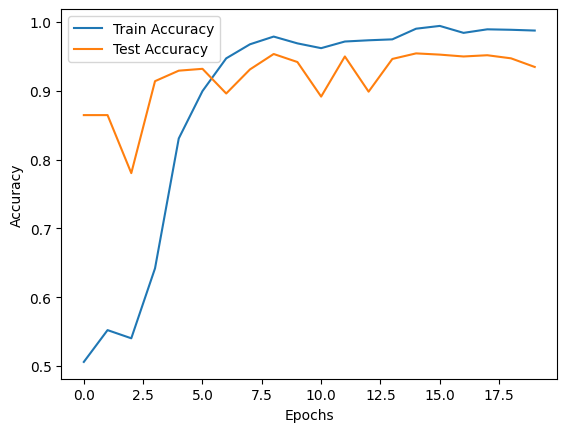

In [164]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [165]:
# Save model
model.save("spam_rnn_model.h5")
print("✅ Model saved as spam_rnn_model.h5")


✅ Model saved as spam_rnn_model.h5


In [166]:
import pickle
with open("max_len.pkl", "wb") as f:
    pickle.dump(max_len, f)


In [167]:
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)
print("Tokenizer saved!")


Tokenizer saved!
